# Atividade 03
### Algoritmos de Machine Learning
**Discente:** Danne Makleyston Gomes Pereira <br>
**Disciplina:** Introdução à Ciência de Dados

In [1]:
# Importação da lib para tratar DataFrames e Series
import pandas as pd

# Importação da lib para manipular de arrays, sobre tudo de números
import numpy as np

from unidecode import unidecode

import matplotlib.pyplot as plt
%matplotlib inline

# Importação da lib para exibição de gráficos
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
sns.set(style="ticks", color_codes=True)

from collections import Counter

sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

# Tratando os dados do Dataset Cultura Cearence

In [2]:
df_secult = pd.read_csv('../dt.csv', sep='\t', lineterminator='\n')

In [ ]:
# df_secult.info()

In [3]:
df_secult['amount_registers'] = df_secult['amount_registers'].apply(lambda d: int(np.nan_to_num(d))) 
df_secult['city'] = df_secult['city'].apply(lambda d: d.upper() if d is not np.nan else d)
df_secult['project_title'] = df_secult['project_title'].apply(lambda d: d.upper() if d is not np.nan else d)
df_secult['title'] = df_secult['title'].apply(lambda d: d.upper() if d is not np.nan else d)
df_secult['bidder'] = df_secult['bidder'].apply(lambda d: d.upper() if d is not np.nan else d)
df_secult['city'] = df_secult['city'].apply(lambda d: unidecode(d) if d is not np.nan else d)
df_secult['registration_date_init'] = pd.to_datetime( df_secult['registration_date_init'] )
df_secult['registration_date_end'] = pd.to_datetime( df_secult['registration_date_end'] )

In [4]:
df_secult.drop(['categories', 'order'], axis=1, inplace=True)
df_secult['value'].fillna(0., inplace=True)
df_secult = df_secult[~df_secult['city'].isna()]
df_secult.reset_index(drop=True, inplace=True)

In [ ]:
# df_secult.info()

In [5]:
df_secult.loc[df_secult['city'] == 'CRATO-CE', 'city'] = 'CRATO'
df_secult.loc[df_secult['city'] == 'ARACATI-CE', 'city'] = 'ARACATI'
df_secult.loc[df_secult['city'] == 'FORTAEZA', 'city'] = 'FORTALEZA'
df_secult.loc[df_secult['city'] == 'FORTALEZA.', 'city'] = 'FORTALEZA'
df_secult.loc[df_secult['city'] == 'JUAGUARETAMA', 'city'] = 'JAGUARETAMA'
df_secult.loc[df_secult['city'] == 'JUAZEIRO DO NORTE-\nCE', 'city'] = 'JUAZEIRO DO NORTE'
df_secult.loc[df_secult['city'] == 'JUAZERO DO NORTE', 'city'] = 'JUAZEIRO DO NORTE'
df_secult.loc[df_secult['city'] == 'MONSENHOR  TABOSA', 'city'] = 'MONSENHOR TABOSA'
df_secult.loc[df_secult['city'] == 'QUIXERAM OBIM', 'city'] = 'QUIXERAMOBIM'
df_secult.loc[df_secult['city'] == 'SAO GONCALO DO\nAMARANTE', 'city'] = 'SAO GONCALO DO AMARANTE'
df_secult.loc[df_secult['city'] == 'DEPUTADO IRAPUA PINHEIRO', 'city'] = 'DEPUTADO IRAPUAN PINHEIRO'
df_secult.loc[df_secult['city'] == 'PECEM', 'city'] = 'FORTALEZA'

In [6]:
df_secult.rename(columns = {'amount_date_extensions':'number_of_date_extensions', 
                             'amount_registers':'number_of_registers'}, inplace=True)

### Implementando novas *features*

In [7]:
def get_number_of_approved_projects(data):
    notice_and_number = data['title'].value_counts()
    data['number_of_approved_projects'] = data['title'].apply(lambda d: notice_and_number[d])
    return data

df_dataset = get_number_of_approved_projects(df_secult)

In [8]:
def get_competition(data):
    data['competition'] = data['number_of_registers'] / data['number_of_approved_projects']
    return data

df_dataset = get_competition(df_secult)

In [ ]:
# def get_rate_per_hundred_thousand_population_of_the_approved_projects(data):
#     data['rate_per_hundred_thousand'] = data['number_of_approved_projects'] * 100000 / data['population']
#     return data

# df_dataset = get_rate_per_hundred_thousand_population_of_the_approved_projects(df_secult)

In [9]:
def get_number_of_approved_projects_by_city_by_notice(data):
    number_by_city = data.groupby(by=['title','city'])['city'].value_counts()
    data['number_of_approved_projects_by_city_by_notice'] = 0;
    for index, row in data.iterrows():
        res = number_by_city[row['title'], row['city']].values[0]
        data.loc[index, 'number_of_approved_projects_by_city_by_notice'] = res
    return data

df_dataset = get_number_of_approved_projects_by_city_by_notice(df_secult)

In [10]:
def get_avg_value_by_city(data):
    data['avg_value_by_city_by_notice'] = (data['value'] / data['number_of_approved_projects']) * data['number_of_approved_projects_by_city_by_notice']
    return data

df_dataset = get_avg_value_by_city(df_secult)

In [11]:
def get_month(data):
    data['month'] = data['registration_date_init'].apply(lambda d: d.month)
    return data

df_dataset = get_month(df_secult)

In [12]:
df_secult.shape

(3989, 15)

In [13]:
df_secult_bkp = df_secult.copy()

## Incorporando novos dados
#### Incorporação de novos dados do *dataset* [Brazilian Cities](https://www.kaggle.com/datasets?search=turism&sort=published)

In [14]:
df_brasilian_cities = pd.read_csv('BRAZIL_CITIES.csv', sep=';', lineterminator='\n')

In [15]:
columns = [x.lower().strip().replace('-','').replace(' ','_') for x in df_brasilian_cities.columns.values]

In [16]:
df_brasilian_cities.columns = columns

In [17]:
df_brasilian_cities = df_brasilian_cities[['city', 'state', 'ibge_res_pop', 
                                           'ibge_1559', 'idhm', 'lat', 'long',
                                           'idhm_renda', 'idhm_educacao', 'gdp_capita', 
                                           'comp_b', 'comp_c', 'comp_e', 'comp_f',
                                           'comp_g', 'comp_h', 'comp_i', 'comp_j', 'comp_k', 'comp_l',
                                           'comp_m', 'comp_n', 'comp_p', 'comp_q', 'comp_r', 'comp_s']]

In [18]:
df_brasilian_cities['city'] = df_brasilian_cities['city'].apply(lambda d: unidecode(d.upper()) if d is not np.nan else d)
df_brasilian_cities['state'] = df_brasilian_cities['state'].apply(lambda d: d.upper())

In [19]:
df_ce_cities = df_brasilian_cities[df_brasilian_cities['state'] == 'CE']

In [20]:
df_X = pd.merge(df_secult, df_ce_cities, left_on='city', right_on='city')
df_X.drop(columns=['state'], inplace=True)
df_X.reset_index(drop=True, inplace=True)

In [22]:
# df_X.info()

## Preparando os dados para a clusterização

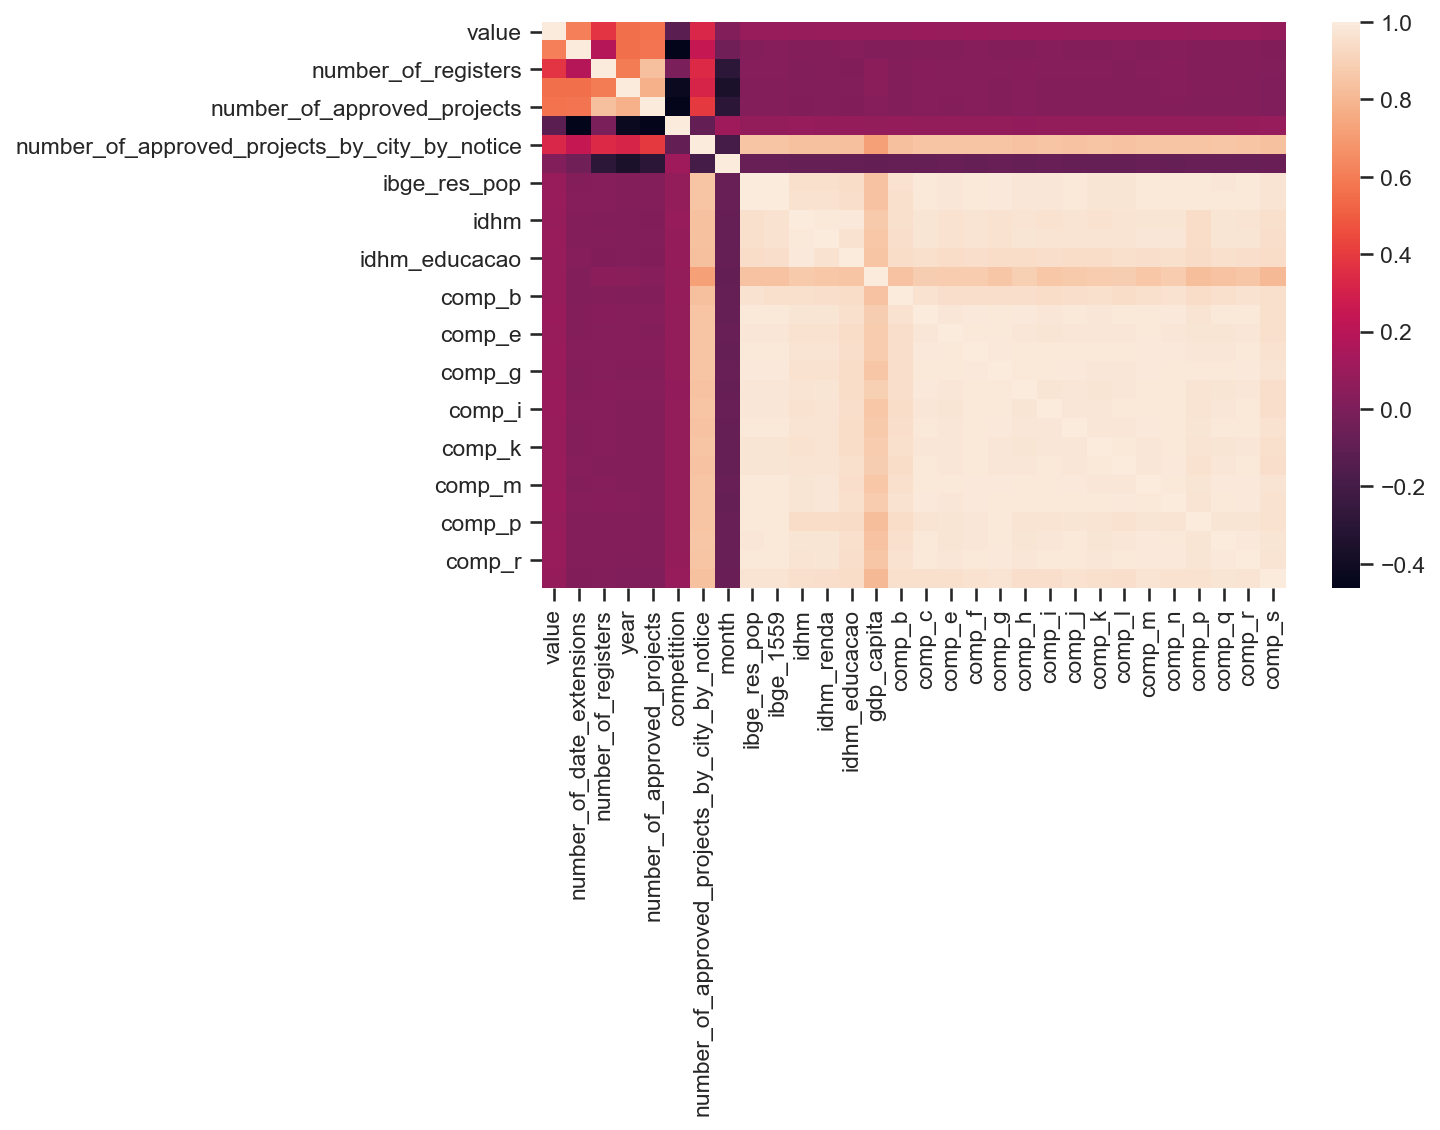

In [23]:
corr = df_X.drop(columns=['lat','long', 'avg_value_by_city_by_notice']).corr(method='spearman')
sns.heatmap(corr, annot=False)
plt.show()

In [24]:
df_X = df_X[df_X['value'] != 0]
df_X_bkp = df_X.copy()

In [25]:
columns_drop = ['title', 'value', 'registration_date_init', 'registration_date_end', 'number_of_date_extensions', 
                'number_of_registers', 'bidder', 'project_title', 'year', 'number_of_approved_projects', 'competition',
                'month']

df_X.drop(columns=columns_drop, inplace=True)

In [ ]:
# df_X.info()

In [26]:
_columns_sum = df_X.groupby(by=['city'])[['number_of_approved_projects_by_city_by_notice','avg_value_by_city_by_notice']].sum()

In [27]:
df_ = df_X.groupby(by=['city']).max()

In [28]:
df_['number_of_approved_projects_by_city_by_notice'] = _columns_sum['number_of_approved_projects_by_city_by_notice']
df_['avg_value_by_city_by_notice'] = _columns_sum['avg_value_by_city_by_notice']

In [29]:
df_

,number_of_approved_projects_by_city_by_notice,avg_value_by_city_by_notice,ibge_res_pop,ibge_1559,idhm,lat,long,idhm_renda,idhm_educacao,gdp_capita,...,comp_i,comp_j,comp_k,comp_l,comp_m,comp_n,comp_p,comp_q,comp_r,comp_s
city,,,,,,,,,,,,,,,,,,,,,
ABAIARA,1,27000.000000,10496.0,2631.0,0.628,-7.356977,-39.047547,0.540,0.612,6370.41,...,10.0,2.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,4.0
ACARAPE,2,28355.834552,15338.0,5149.0,0.606,-4.223138,-38.705624,0.559,0.562,7820.13,...,2.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0,0.0,8.0
ACARAU,13,167685.714286,57551.0,15123.0,0.601,-2.885311,-40.118241,0.554,0.517,9409.83,...,28.0,3.0,0.0,6.0,9.0,14.0,71.0,17.0,6.0,18.0
ACOPIARA,19,197121.589130,51160.0,15121.0,0.595,-6.092762,-39.455705,0.563,0.517,6966.18,...,15.0,5.0,1.0,4.0,7.0,5.0,5.0,2.0,4.0,25.0
AIUABA,2,14742.857143,16203.0,2382.0,0.569,-6.563298,-40.123160,0.518,0.474,5946.54,...,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
URUBURETAMA,10,47133.540373,19765.0,9055.0,0.639,-3.623017,-39.508178,0.564,0.608,17862.64,...,9.0,1.0,0.0,0.0,3.0,2.0,4.0,5.0,2.0,8.0
URUOCA,5,44581.184669,12883.0,4589.0,0.570,-3.313231,-40.561163,0.503,0.485,9040.85,...,4.0,2.0,0.0,0.0,1.0,1.0,12.0,2.0,1.0,14.0
VARJOTA,20,479675.059105,17593.0,8364.0,0.611,-4.182822,-40.478993,0.575,0.545,12483.07,...,20.0,3.0,0.0,0.0,8.0,8.0,9.0,8.0,2.0,35.0


In [30]:
df_.to_csv('../df_preparado_para_clusterizacao.csv', sep='\t', encoding='utf-8')